### Author: Pavan Choudhari

# Setup method

Collecting data from source

In [ ]:
pip install wget==3.2

In [47]:
import numpy as np
from pycocotools.coco import COCO
import random
import skimage.io as io

In [44]:
import zipfile
import wget
import os
import cv2
class data_extractor():
  def __init__(self):
    self.file_names = list()
    self.extractflag = list()

  def download(self):
    url_list = ['http://images.cocodataset.org/annotations/annotations_trainval2017.zip','http://images.cocodataset.org/zips/val2017.zip','http://images.cocodataset.org/zips/train2017.zip']
    dirdetails = os.listdir()
    for url in url_list:
      x = url.split('/')[-1].replace('.zip','')
      if x not in dirdetails:
        wget.download(url)
        self.extractflag.append(True)
      else:
        print("Skipping download {} as file is already present".format(x))
        self.extractflag.append(False)
      self.file_names.append(x)

    print("Successfully downloaded the data files")
    

  
  def extract(self):
    for i,j in enumerate(self.file_names):
      if self.extractflag[i]:
        with zipfile.ZipFile('/content/{}.zip'.format(j), 'r') as zip_ref:
          zip_ref.extractall('/content')
        print("Extraction Successfull for file {}".format(j))
      else:
        print("No Extraction for file {}".format(j))
    self.deletezip()
  
  def deletezip(self):
    for i,j in enumerate(self.file_names):
      if self.extractflag[i]:
        os.remove(j+'.zip')


data_gen = data_extractor()
data_gen.download()
data_gen.extract()

Skipping download val2017 as file is already present
Successfully downloaded the data files
Extraction Successfull for file annotations_trainval2017
No Extraction for file val2017
Extraction Successfull for file train2017


In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
annotate='/content/annotations/instances_val2017.json'
coco=COCO(annotate)
id = coco.getCatIds()
categories = coco.loadCats(id)
form = [(i['id'],i['name']) for i in categories]

loading annotations into memory...
Done (t=0.68s)
creating index...
index created!


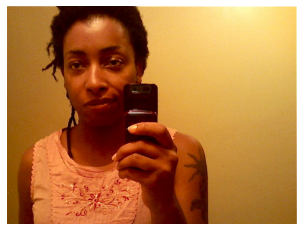

In [91]:
catIds = 1
imgIds = coco.getImgIds(catIds= catIds)
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
I = io.imread('%s2017/%s'%('val',img['file_name']))/255.0
plt.axis('off')
plt.imshow(I)
plt.show()

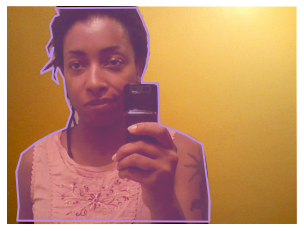

In [92]:
# Load and display instance annotations
plt.imshow(I)
plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=1, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

Phase 1 of the notebook has been complete with loading the data. Next I will experiment with using Deep Learning models for segmentation and openpose for posture recognition. The images need to be filtered further to get the correct types of images that we are trying to work with.